# Άσκηση #4, Εξαγωγή χαρακτηριστικών για ανάκτηση (retrieval) εικόνων:
Θεωρήστε τη γενική αρχιτεκτονική ενός συστήματος ανάκτησης εικόνων με βάση το περιεχόμενο (Content-Based Image Retrieval, CBIR) που φαίνεται στο παρακάτω σχήμα. 
Θεωρήστε το δημόσιο σύνολο  εικόνων  ‘Chess  Pieces  Detection  Images  Dataset
(https://www.kaggle.com/datasets/anshulmehtakaggl/chess-pieces-detection-images-dataset),  το  οποίο  περιέχει  εικόνες  από πιόνια σκακιού που ανήκουν στις ακόλουθες 5 κατηγορίες:
1) Queen
2) Rook
3) Bishop
4) Knight
5) Pawn 
 
**Ζητούμενα:** 

Α. Για κάθε εικόνα του συνόλου δεδομένων (αφού τη μετατρέψετε σε εικόνα αποχρώσεων του  γκρι),  εξάγετε  και  αποθηκεύστε  ένα  καθολικό  (global)  χαρακτηριστικό  σάκου 
οπτικών  λέξεων  (bag  of  visual  words),  το  οποίο  να  στηρίζεται  στον  υπολογισμό τοπικών (local) χαρακτηριστικών SIFT.


Β. Θεωρήστε ως εικόνες αναζήτησης τα ακόλουθα αντιπροσωπευτικά δείγματα από κάθε κλάση:  `Queen-Resized\00000000_resized.jpg`, `Queen-Resized\00000001_resized.jpg`, `Rook-resize\00000001_resized.jpg`,  `Rook-resize\00000002_resized.jpg`,  `bishop_resized\00000000_resized.jpg`, `bishop_resized\ 00000002_resized.jpg`, `knight-resize\00000001_resized.jpg`,`knight-resize\00000002_resized.jpg`,  `pawn_resized\00000001_resized.jpg`,  και `pawn_resized\00000002_resized.jpg`. Θεωρήστε  ως  μέτρο  ομοιότητας  (similarity metric)  2  εικόνων  την Ευκλείδεια  απόσταση ανάμεσα  στα  αντίστοιχα χαρακτηριστικά  τους. Μικρότερες  τιμές Ευκλείδειας  απόστασης υποδηλώνουν  εικόνες  που ομοιάζουν  οπτικά περισσότερο.


Γ. Για  τις  εικόνες  αναζήτησης και  τη  μετρική  ομοιότητας που  έχουν  οριστεί  στο  (Β), υπολογίστε τις 10 πιο όμοιες εικόνες  στο  σύνολο δεδομένων  (top-10  retrieval results).  Στα  top-10  αποτελέσματα  δε  θα  πρέπει  να  περιλαμβάνεται  η  εικόνα αναζήτησης  (query  image)  κάθε  φορά.  Υπολογίστε  τη  συνολική  μέση  ακρίβεια ανάκτησης (retrieval accuracy), δηλαδή το ποσοστό των εικόνων που έχουν ανακτηθεί και ανήκουν στην ίδια κατηγορία με την εικόνα αναζήτησης κάθε φορά. Σχολιάστε τα αποτελέσματα.


Δ. Παραθέστε ενδεικτικά top-10 αποτελέσματα ανάκτησης (για 2-3 εικόνες αναζήτησης). 
 
Στην αναφορά να περιληφθούν απαντήσεις μόνο για τα ζητούμενα (Α), (Γ) και (Δ). Για τα  αποτελέσματα ανάκτησης, συμπεριλάβετε μόνο τα βέλτιστα αποτελέσματα που προκύπτουν μετά από πειραματισμό και εξηγήστε λεπτομερώς τη διαδικασία σχεδίασης (π.χ. καθορισμός παραμέτρων εξαγωγής χαρακτηριστικών σάκου οπτικών λέξεων, κτλ.). 

In [27]:
%pip install scikit-image matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


Ζητούμενο Α:
Φόρτωση εικόνων και μετατροπή τους σε αποχρώσεις του γκρι...
Ολοκληρώθηκε η φόρτωση εικόνων και η μετατροπή!
Εξαγωγή χαρακτηριστικών SIFT...
Ολοκληρώθηκε η εξαγωγή χαρακτηριστικών SIFT.
Δημιουργία και αποθήκευση καθολικών (global) χαρακτηριστικών τύπου Bag of Visual Words (BoVW)...
Ολοκληρώθηκε η δημιουργία και αποθήκευση των global χαρακτηριστικών.

Ζητούμενο Β:
Μετατροπή των εικόνων αναζήτησης σε BoVW χαρακτηριστικά...
Ολοκληρώθηκε η μετατροπή των query εικόνων σε BoVW.
Υπολογισμός ευκλείδειας απόστασης...
Ολοκληρώθηκε ο υπολογισμός αποστάσεων.

Ζητούμενο Γ:
Υπολογισμός top-10 πιο όμοιων εικόνων για κάθε εικόνα αναζήτησης και ακρίβειας ανάκτησης...


,Query #,Query Label,Correct Matches,Accuracy (%)
,1,queen,6,60.0
,2,queen,3,30.0
,3,rook,4,40.0
,4,rook,4,40.0
,5,bishop,2,20.0
,6,bishop,1,10.0
,7,knight,4,40.0
,8,knight,4,40.0
,9,pawn,1,10.0
,10,pawn,1,10.0



Μέση ακρίβεια ανάκτησης: 30.00%

Ζητούμενο Δ:
Οπτική παρουσίαση των top-10 αποτελεσμάτων ανάκτησης για 3 εικόνες αναζήτησης.



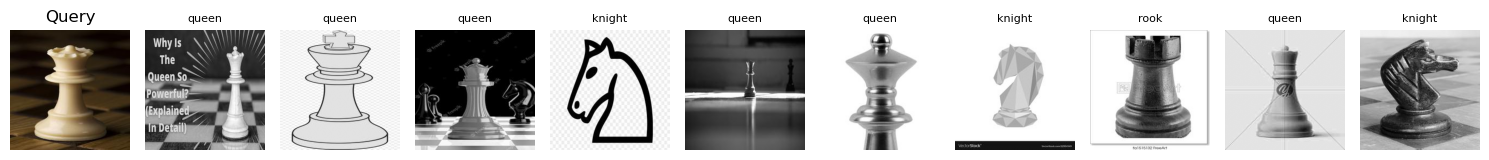

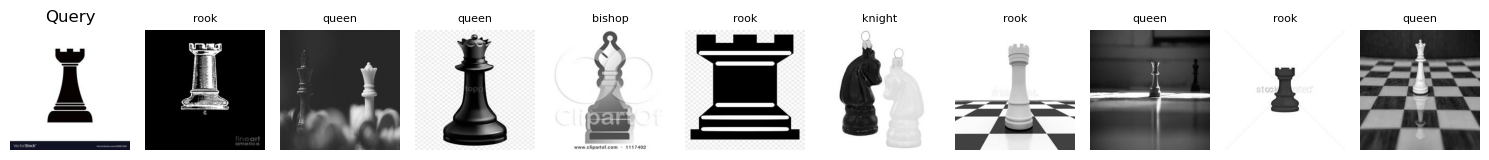

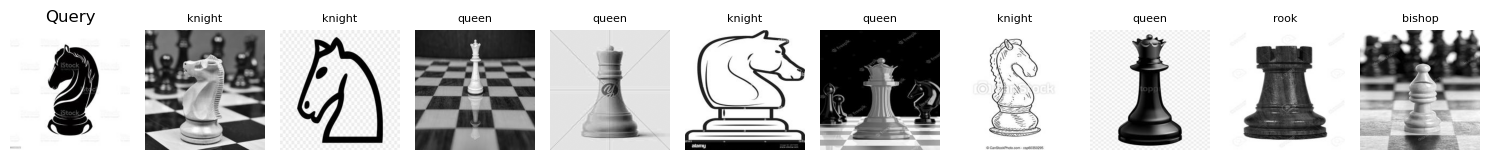

In [ ]:
import cv2
import os
import numpy as np
from skimage.feature import SIFT
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd

dataset_path_bishop = "~/code/semester_6/photo/projects/project-2/instructions/archive-1/bishop_resized"
dataset_path_knight = "~/code/semester_6/photo/projects/project-2/instructions/archive-1/knight-resize"
dataset_path_pawn = "~/code/semester_6/photo/projects/project-2/instructions/archive-1/pawn_resized"
dataset_path_queen = "~/code/semester_6/photo/projects/project-2/instructions/archive-1/Queen-Resized"
dataset_path_rook = "~/code/semester_6/photo/projects/project-2/instructions/archive-1/Rook-resize"

# Φορτώνει όλες τις .jpg εικόνες από έναν φάκελο, τις μετατρέπει σε grayscale και επιστρέφει λίστα εικόνων.
def load_images_and_convert(dataset_path):
    images = []
    dataset_path = os.path.expanduser(dataset_path)
    for filename in os.listdir(dataset_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(dataset_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    
    return images

# ==================== Α ====================
print("Ζητούμενο Α:")
print("Φόρτωση εικόνων και μετατροπή τους σε αποχρώσεις του γκρι...")
bishop_images = load_images_and_convert(dataset_path_bishop)
knight_images = load_images_and_convert(dataset_path_knight)
pawn_images = load_images_and_convert(dataset_path_pawn)
queen_images = load_images_and_convert(dataset_path_queen)
rook_images = load_images_and_convert(dataset_path_rook)
print("Ολοκληρώθηκε η φόρτωση εικόνων και η μετατροπή!")

# Όλες οι εικόνες
all_images = bishop_images + knight_images + pawn_images + queen_images + rook_images

all_descriptors = []
count_img = 0

# Για κάθε εικόνα εφαρμόζεται ο SIFT αλγόριθμος για εξαγωγή τοπικών χαρακτηριστικών (keypoints, descriptors).
print("Εξαγωγή χαρακτηριστικών SIFT...")
for idx, image in enumerate(all_images):
    count_img += 1
    sift = cv2.SIFT_create()
    try:
        keypoints, descriptors = sift.detectAndCompute(image, None)
        if descriptors is not None and len(descriptors) > 0:
            all_descriptors.append(descriptors)
    except Exception as e:
        continue
print("Ολοκληρώθηκε η εξαγωγή χαρακτηριστικών SIFT.")

# Ενοποίηση descriptors για δημιουργία οπτικού λεξικού
print("Δημιουργία και αποθήκευση καθολικών (global) χαρακτηριστικών τύπου Bag of Visual Words (BoVW)...")
all_descriptors_concat = np.vstack(all_descriptors)
num_clusters = 1000
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(all_descriptors_concat)

# Συνάρτηση υπολογισμού BoVW histogram
def compute_bovw_histogram(descriptors, kmeans, num_clusters):
    if descriptors is None or len(descriptors) == 0:
        return np.zeros(num_clusters)
    words = kmeans.predict(descriptors)
    histogram, _ = np.histogram(words, bins=np.arange(num_clusters + 1))
    histogram = histogram.astype("float32")
    histogram /= (histogram.sum() + 1e-7)
    return histogram

# Δημιουργία BoVW vector για κάθε εικόνα
bovw_features = []
for desc in all_descriptors:
    hist = compute_bovw_histogram(desc, kmeans, num_clusters)
    bovw_features.append(hist)
print("Ολοκληρώθηκε η δημιουργία και αποθήκευση των global χαρακτηριστικών.")

# ================== Β =======================
print("\nΖητούμενο Β:")
query_path = "~/code/semester_6/photo/projects/project-2/instructions/archive-1/"
search_images = [
    "Queen-Resized/00000000_resized.jpg",
    "Queen-Resized/00000001_resized.jpg",
    "Rook-resize/00000001_resized.jpg",
    "Rook-resize/00000002_resized.jpg",
    "bishop_resized/00000000_resized.jpg",
    "bishop_resized/00000002_resized.jpg",
    "knight-resize/00000001_resized.jpg",
    "knight-resize/00000002_resized.jpg",
    "pawn_resized/00000001_resized.jpg",
    "pawn_resized/00000002_resized.jpg"
]

search_descriptors = []
for s_image in search_images:
    img_path = os.path.expanduser(os.path.join(query_path, s_image))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)

        if descriptors is not None and len(descriptors) > 0:
            search_descriptors.append(descriptors)
        else:
            print(f"Δεν βρέθηκαν χαρακτηριστικά για την εικόνα: {s_image}")

print("Μετατροπή των εικόνων αναζήτησης σε BoVW χαρακτηριστικά...")
query_bovw_features = []
for desc in search_descriptors:
    hist = compute_bovw_histogram(desc, kmeans, num_clusters)
    query_bovw_features.append(hist)
print("Ολοκληρώθηκε η μετατροπή των query εικόνων σε BoVW.")

print("Υπολογισμός ευκλείδειας απόστασης...")
def compute_bovw_similarity(query_features, dataset_features):
    distances = []
    for q_feat in query_features:
        dists = [euclidean(q_feat, feat) for feat in dataset_features]
        distances.append(dists)
    return distances

bovw_distances = compute_bovw_similarity(query_bovw_features, bovw_features)
print("Ολοκληρώθηκε ο υπολογισμός αποστάσεων.")

# ================== Γ =======================
print("\nΖητούμενο Γ:")
print("Υπολογισμός top-10 πιο όμοιων εικόνων για κάθε εικόνα αναζήτησης και ακρίβειας ανάκτησης...")

# Labels για τις εικόνες του dataset
dataset_labels = (
    ['bishop'] * len(bishop_images) +
    ['knight'] * len(knight_images) +
    ['pawn'] * len(pawn_images) +
    ['queen'] * len(queen_images) +
    ['rook'] * len(rook_images)
)

# Labels για τις query εικόνες
query_labels = []
for img in search_images:
    if "bishop" in img:
        query_labels.append("bishop")
    elif "knight" in img:
        query_labels.append("knight")
    elif "pawn" in img:
        query_labels.append("pawn")
    elif "Queen" in img:
        query_labels.append("queen")
    elif "Rook" in img:
        query_labels.append("rook")

accuracies = []

results = []

for i, dists in enumerate(bovw_distances):
    query_label = query_labels[i]
    sorted_indices = np.argsort(dists)
    top_10_indices = sorted_indices[:10]
    correct = sum(1 for idx in top_10_indices if dataset_labels[idx] == query_label)
    accuracy = correct / 10.0
    accuracies.append(accuracy)

    results.append({
        'Query #': i + 1,
        'Query Label': query_label,
        'Correct Matches': correct,
        'Accuracy (%)': round(accuracy * 100, 2)
    })

# Δημιουργία DataFrame και εμφάνιση
df_accuracy = pd.DataFrame(results)
df_accuracy.index = [''] * len(df_accuracy)
display(df_accuracy)

# Τελική μέση ακρίβεια
mean_accuracy = np.mean(accuracies)
print(f"\nΜέση ακρίβεια ανάκτησης: {mean_accuracy * 100:.2f}%")

# ================== Δ =======================

def show_query_and_top10(query_index, query_path, search_images, bovw_distances, all_images, dataset_labels):
    # Φόρτωση query εικόνας
    query_image_path = os.path.expanduser(os.path.join(query_path, search_images[query_index]))
    query_img = cv2.imread(query_image_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)

    # Top-10 αποτελέσματα
    dists = bovw_distances[query_index]
    top_10_indices = np.argsort(dists)[:10]

    # Εμφάνιση
    plt.figure(figsize=(15, 2))
    plt.subplot(1, 11, 1)
    plt.imshow(query_img)
    plt.title("Query")
    plt.axis('off')

    for i, idx in enumerate(top_10_indices):
        result_img = all_images[idx]
        plt.subplot(1, 11, i + 2)
        plt.imshow(result_img, cmap='gray')
        plt.title(dataset_labels[idx], fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\nΖητούμενο Δ:")
print("Οπτική παρουσίαση των top-10 αποτελεσμάτων ανάκτησης για 3 εικόνες αναζήτησης.\n")

show_query_and_top10(0, query_path, search_images, bovw_distances, all_images, dataset_labels)  # Queen
show_query_and_top10(2, query_path, search_images, bovw_distances, all_images, dataset_labels)  # Rook
show_query_and_top10(6, query_path, search_images, bovw_distances, all_images, dataset_labels)  # Knight
